In [23]:
import pandas as pd
import edaSQL
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns

In [24]:
edasql = edaSQL.SQL(printAll=True)

### NOTA


Para poder ejecutar correctamente el script recuerde reemplazar los valores de conexion (user, password) con los suyos. Asi mismo, no debe olvidar reestaurar la base de datos Datawarehouse que sera subida al repositorio de Github.

In [25]:
# Conectar a la base de datos
edasql.connectToDataBase(
    server='localhost',
    database='softDevelopersDW',
    user='softdevelopers',
    password='RonaldoGOAT7',
    sqlDriver='ODBC Driver 17 for SQL Server'
)

========== Connected to DataBase Successfully ===========
Server:  localhost
DataBase:  softDevelopersDW
User :  softdevelopers
Password :  RonaldoGOAT7


### Analisis

In [26]:
# Realizar la consulta a la base de datos
querie = "SELECT * FROM Fact_Payment AS f FULL JOIN Dim_Customer AS c ON f.[customer key] = c.[customer key] LEFT JOIN Dim_Project AS p ON f.[project key] = p.[project key] LEFT JOIN Dim_Date AS d ON f.[payment date key] = d.[Date Key]"
data = pd.read_sql(querie, edasql.dbConnection)
data.head(10)

,payment key,customer key,project key,payment date key,payment amount,_SourceCustomerKey,_SourceProjectKey,Lineage Key,customer key,_Source Key,...,Special Day,First Date Of Year,Last Date Of Year,First Date Of Quater,Last Date Of Quater,First Date Of Month,Last Date Of Month,First Date Of Week,Last Date Of Week,Lineage Key
0,NaN,NaN,NaN,NaN,NaN,None,None,NaN,1,,...,None,None,None,None,None,None,None,None,None,NaN
1,1.0,354.0,2.0,20121030.0,20058.0,353,1,3.0,354,HSD|353,...,,2012-01-01,2012-12-31,2024-04-01,2024-06-30,2012-10-01,2012-10-31,2012-10-28,2012-11-03,3.0
2,2.0,318.0,3.0,0.0,20905.0,317,2,3.0,318,HSD|317,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0
3,3.0,91.0,4.0,20120704.0,5498.0,90,3,3.0,91,HSD|90,...,,2012-01-01,2012-12-31,2024-04-01,2024-06-30,2012-07-01,2012-07-31,2012-07-01,2012-07-07,3.0
4,4.0,232.0,5.0,20141009.0,12044.0,231,4,3.0,232,HSD|231,...,,2014-01-01,2014-12-31,2024-04-01,2024-06-30,2014-10-01,2014-10-31,2014-10-05,2014-10-11,3.0
5,5.0,163.0,6.0,20190526.0,11298.0,162,5,3.0,163,HSD|162,...,,2019-01-01,2019-12-31,2024-04-01,2024-06-30,2019-05-01,2019-05-31,2019-05-26,2019-06-01,3.0
6,6.0,460.0,7.0,0.0,16517.0,459,6,3.0,460,HSD|459,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0
7,7.0,247.0,8.0,0.0,14198.0,246,7,3.0,247,HSD|246,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0
8,8.0,179.0,9.0,20230821.0,20021.0,178,8,3.0,179,HSD|178,...,,2023-01-01,2023-12-31,2024-04-01,2024-06-30,2023-08-01,2023-08-31,2023-08-20,2023-08-26,3.0
9,9.0,499.0,10.0,0.0,20481.0,498,9,3.0,499,HSD|498,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0


In [27]:
# Ultimos 5 registros
data.tail(5)

,payment key,customer key,project key,payment date key,payment amount,_SourceCustomerKey,_SourceProjectKey,Lineage Key,customer key,_Source Key,...,Special Day,First Date Of Year,Last Date Of Year,First Date Of Quater,Last Date Of Quater,First Date Of Month,Last Date Of Month,First Date Of Week,Last Date Of Week,Lineage Key
9135,2902.0,91.0,9120.0,20110915.0,1203.0,90,9995,3.0,91,HSD|90,...,,2011-01-01,2011-12-31,2024-04-01,2024-06-30,2011-09-01,2011-09-30,2011-09-11,2011-09-17,3.0
9136,5866.0,354.0,9121.0,20160308.0,23010.0,353,9996,3.0,354,HSD|353,...,,2016-01-01,2016-12-31,2024-04-01,2024-06-30,2016-03-01,2016-03-31,2016-03-06,2016-03-12,3.0
9137,3827.0,282.0,9123.0,0.0,23015.0,281,9998,3.0,282,HSD|281,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0
9138,7481.0,282.0,9123.0,0.0,36062.0,281,9998,3.0,282,HSD|281,...,N/A,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,1753-01-01,-1.0
9139,8566.0,452.0,9124.0,20140925.0,5898.0,451,9999,3.0,452,HSD|451,...,,2014-01-01,2014-12-31,2024-04-01,2024-06-30,2014-09-01,2014-09-30,2014-09-21,2014-09-27,3.0


In [28]:
# Cantidad de registros en el dataframe
len(data)

9140

In [29]:
data.columns

Index(['payment key', 'customer key', 'project key', 'payment date key',
       'payment amount', '_SourceCustomerKey', '_SourceProjectKey',
       'Lineage Key', 'customer key', '_Source Key', 'company name',
       'company contact', 'company location', 'Valid From', 'Valid To',
       'Lineage Key', 'project key', '_Source Key', 'project name',
       'project description', 'project start date', 'project end date',
       'project profit margin', 'project state', 'project deadline',
       'Valid From', 'Valid To', 'Lineage Key', 'Date Key', 'Date', 'Day',
       'Day Suffix', 'Weekday', 'Weekday Name', 'Weekday Name Short',
       'Weekday Name FirstLetter', 'Day Of Year', 'Week Of Month',
       'Week Of Year', 'Month', 'Month Name', 'Month Name Short',
       'Month Name FirstLetter', 'Quarter', 'Quarter Name', 'Year', 'MMYYYY',
       'Month Year', 'Is Weekend', 'Is Holiday', 'Holiday Name', 'Special Day',
       'First Date Of Year', 'Last Date Of Year', 'First Date Of Quater',

In [30]:
# Eliminar columnas no necesarias
df = data.drop(['payment date key','payment key', 'customer key', 'project key', '_SourceCustomerKey', '_SourceProjectKey', 'Lineage Key', '_Source Key', 'Valid From', 'Valid To', 'Date Key', 'Day Suffix', 'Weekday', 'Weekday Name Short',
       'Weekday Name FirstLetter',
       'Week Of Year', 'Month Name Short',
       'Month Name FirstLetter', 'Day Of Year', 'Week Of Month', 'Quarter', 'Quarter Name', 'MMYYYY',
       'Month Year', 'Is Weekend', 'Is Holiday', 'Holiday Name', 'Special Day',
       'First Date Of Year', 'Last Date Of Year', 'First Date Of Quater',
       'Last Date Of Quater', 'First Date Of Month', 'Last Date Of Month', 'First Date Of Week', 'Last Date Of Week'], axis=1)
df.head(5)

,payment amount,company name,company contact,company location,project name,project description,project start date,project end date,project profit margin,project state,project deadline,Date,Day,Weekday Name,Month,Month Name,Year
0,NaN,N/A,N/A,N/A,None,None,None,None,NaN,None,None,None,NaN,None,NaN,None,NaN
1,20058.0,Luctus Vulputate Nisi Foundation,magnis.dis@aol.edu,Ap #102-2055 In Road,Fintone,erat eros viverra eget congue eget semper rutr...,2016-10-08,2013-12-20,730.0,Pendiente,2011-03-11,2012-10-30,30.0,Tuesday,10.0,October,2012.0
2,20905.0,Nulla Donec Non Institute,morbi.accumsan.laoreet@google.net,8392 Eget Avenue,Job,faucibus cursus urna ut tellus nulla ut erat i...,2022-11-28,2014-11-01,4931.0,Pendiente,2020-12-14,1753-01-01,0.0,N/A,0.0,N/A,0.0
3,5498.0,Lacus Nulla Foundation,dolor@outlook.net,"Ap #729-9276 Odio, Rd.",Bytecard,pede posuere nonummy integer non velit donec d...,2018-01-22,2011-10-10,1618.0,Pendiente,2022-02-12,2012-07-04,4.0,Wednesday,7.0,July,2012.0
4,12044.0,Lacus Cras Interdum Inc.,aliquet.vel@protonmail.net,"P.O. Box 244, 5793 Orci. St.",Bytecard,dui maecenas tristique est et tempus semper es...,2021-03-09,2016-02-23,3740.0,Pendiente,2015-05-16,2014-10-09,9.0,Thursday,10.0,October,2014.0


In [31]:
df.columns

Index(['payment amount', 'company name', 'company contact', 'company location',
       'project name', 'project description', 'project start date',
       'project end date', 'project profit margin', 'project state',
       'project deadline', 'Date', 'Day', 'Weekday Name', 'Month',
       'Month Name', 'Year'],
      dtype='object')

In [32]:
# Mostrando los tipos de datos de cada columna
df.dtypes

payment amount           float64
company name              object
company contact           object
company location          object
project name              object
project description       object
project start date        object
project end date          object
project profit margin    float64
project state             object
project deadline          object
Date                      object
Day                      float64
Weekday Name              object
Month                    float64
Month Name                object
Year                     float64
dtype: object

In [33]:
# Mostrando estadisticos descriptivos basicos del dataframe
print(df.describe())

       payment amount  project profit margin          Day        Month  \
count     9139.000000            9139.000000  9139.000000  9139.000000   
mean     20962.575884            8416.059525    13.592187     5.625123   
std      18132.923248            3985.708869     9.773374     3.900318   
min       1200.000000               0.000000     0.000000     0.000000   
25%       5653.000000            5606.000000     4.000000     2.000000   
50%      23009.000000            8543.000000    13.000000     6.000000   
75%      23075.000000           11784.000000    22.000000     9.000000   
max      79981.000000           15000.000000    31.000000    12.000000   

              Year  
count  9139.000000  
mean   1742.390196  
std     688.794063  
min       0.000000  
25%    2008.000000  
50%    2013.000000  
75%    2018.000000  
max    2024.000000  


In [34]:
df.info

<bound method DataFrame.info of       payment amount                      company name  \
0                NaN                               N/A   
1            20058.0  Luctus Vulputate Nisi Foundation   
2            20905.0         Nulla Donec Non Institute   
3             5498.0            Lacus Nulla Foundation   
4            12044.0          Lacus Cras Interdum Inc.   
...              ...                               ...   
9135          1203.0            Lacus Nulla Foundation   
9136         23010.0  Luctus Vulputate Nisi Foundation   
9137         23015.0              Augue Ac Corporation   
9138         36062.0              Augue Ac Corporation   
9139          5898.0                  Dolor Consulting   

                        company contact                 company location  \
0                                   N/A                              N/A   
1                    magnis.dis@aol.edu             Ap #102-2055 In Road   
2     morbi.accumsan.laoreet@google.net    

In [35]:
# Ver algunos datos sobre el dataset
insights = edaSQL.EDA(dataFrame=df, HTMLDisplay=True)
dataInsights = insights.dataInsights()

Number of Columns :,17
Number of Rows :,9140
Overall Missing cells :,14
Overall Missing cells (%) :,0.01
Duplicate rows :,0
Duplicate rows (%) :,0.0
Numeric :,5
Categorical :,12
Date and Time :,0


In [36]:
df.shape

(9140, 17)

In [37]:
# Renombrando columnas
#df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cilindros", "Transmission Type": "Transmision", "Driven_Wheels": "Tracción","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Precio" })
#df.head(5)

In [38]:
# Eliminando los registros duplicados
df = df.drop_duplicates()
df.shape

(9140, 17)

In [39]:
# Revisando cuantos registros tienen valores
df.count()

payment amount           9139
company name             9140
company contact          9140
company location         9140
project name             9139
project description      9139
project start date       9139
project end date         9139
project profit margin    9139
project state            9139
project deadline         9139
Date                     9139
Day                      9139
Weekday Name             9139
Month                    9139
Month Name               9139
Year                     9139
dtype: int64

In [40]:
# Revisando cuantos valores nulos tiene cada columna
df.isnull().sum()

payment amount           1
company name             0
company contact          0
company location         0
project name             1
project description      1
project start date       1
project end date         1
project profit margin    1
project state            1
project deadline         1
Date                     1
Day                      1
Weekday Name             1
Month                    1
Month Name               1
Year                     1
dtype: int64

In [41]:
# Eliminando los valores nulos
df = df.dropna()
df.count()

payment amount           9139
company name             9139
company contact          9139
company location         9139
project name             9139
project description      9139
project start date       9139
project end date         9139
project profit margin    9139
project state            9139
project deadline         9139
Date                     9139
Day                      9139
Weekday Name             9139
Month                    9139
Month Name               9139
Year                     9139
dtype: int64

In [42]:
# Eliminar valores nulos representados por 'N/A'
df.replace('N/A', pd.NA, inplace=True)
df.dropna(inplace=True)
df.shape

(7367, 17)

In [43]:
df['profit margin percentage'] = ((df['project profit margin'] / df['payment amount']) * 100).round(2)

In [44]:
df.head()

,payment amount,company name,company contact,company location,project name,project description,project start date,project end date,project profit margin,project state,project deadline,Date,Day,Weekday Name,Month,Month Name,Year,profit margin percentage
1,20058.0,Luctus Vulputate Nisi Foundation,magnis.dis@aol.edu,Ap #102-2055 In Road,Fintone,erat eros viverra eget congue eget semper rutr...,2016-10-08,2013-12-20,730.0,Pendiente,2011-03-11,2012-10-30,30.0,Tuesday,10.0,October,2012.0,3.64
3,5498.0,Lacus Nulla Foundation,dolor@outlook.net,"Ap #729-9276 Odio, Rd.",Bytecard,pede posuere nonummy integer non velit donec d...,2018-01-22,2011-10-10,1618.0,Pendiente,2022-02-12,2012-07-04,4.0,Wednesday,7.0,July,2012.0,29.43
4,12044.0,Lacus Cras Interdum Inc.,aliquet.vel@protonmail.net,"P.O. Box 244, 5793 Orci. St.",Bytecard,dui maecenas tristique est et tempus semper es...,2021-03-09,2016-02-23,3740.0,Pendiente,2015-05-16,2014-10-09,9.0,Thursday,10.0,October,2014.0,31.05
5,11298.0,Amet Limited,suspendisse@hotmail.net,Ap #360-8306 Odio Av.,Duobam,faucibus orci luctus et ultrices posuere cubil...,2021-10-28,2015-08-03,757.0,Entregado,2014-06-29,2019-05-26,26.0,Sunday,5.0,May,2019.0,6.70
8,20021.0,Diam PC,velit.eget.laoreet@hotmail.ca,7791 Aliquam Street,Voltsillam,quis libero nullam sit amet turpis elementum l...,2016-08-29,1753-01-01,0.0,Entregado,2021-09-07,2023-08-21,21.0,Monday,8.0,August,2023.0,0.00


In [47]:
df.dtypes

payment amount              float64
company name                 object
company contact              object
company location             object
project name                 object
project description          object
project start date           object
project end date             object
project profit margin       float64
project state                object
project deadline             object
Date                         object
Day                         float64
Weekday Name                 object
Month                       float64
Month Name                   object
Year                        float64
profit margin percentage    float64
dtype: object

In [48]:
# Proyectos finalizados/entregados ordenados por orden alfabetico
df[df['project state'] == 'Entregado'].sort_values(by='project name')

,payment amount,company name,company contact,company location,project name,project description,project start date,project end date,project profit margin,project state,project deadline,Date,Day,Weekday Name,Month,Month Name,Year,profit margin percentage
5632,75414.0,Egestas Associates,elit.erat@yahoo.couk,"Ap #852-9691 Pede, Rd.",Aerified,Nulla suscipit ligula in lacus.,2008-04-13,2011-05-28,5438.0,Entregado,2023-09-09,2019-10-16,16.0,Wednesday,10.0,October,2019.0,7.21
7740,23014.0,Eu Odio PC,massa.suspendisse@icloud.ca,Ap #346-4812 Sapien St.,Aerified,Maecenas tincidunt lacus at velit. Vivamus vel...,2009-07-03,2022-01-02,11792.0,Entregado,2006-03-14,2007-01-04,4.0,Thursday,1.0,January,2007.0,51.24
1636,14221.0,Ante Ltd,consequat.enim@aol.couk,Ap #720-2688 Ultricies Rd.,Aerified,odio in hac habitasse platea dictumst maecenas...,2016-12-06,2012-03-22,2760.0,Entregado,2013-12-18,2017-04-06,6.0,Thursday,4.0,April,2017.0,19.41
3100,23069.0,In Foundation,amet@protonmail.couk,404-8501 Mauris Rd.,Aerified,Mauris lacinia sapien quis libero. Nullam sit ...,2012-07-17,1753-01-01,13299.0,Entregado,2012-07-05,2008-06-11,11.0,Wednesday,6.0,June,2008.0,57.65
3099,59191.0,In Foundation,amet@protonmail.couk,404-8501 Mauris Rd.,Aerified,Mauris lacinia sapien quis libero. Nullam sit ...,2012-07-17,1753-01-01,13299.0,Entregado,2012-07-05,2005-11-15,15.0,Tuesday,11.0,November,2005.0,22.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,23068.0,Dolor Sit Incorporated,malesuada@protonmail.org,395-5303 Ipsum Road,Zoolab,"Lorem ipsum dolor sit amet, consectetuer adipi...",2015-09-17,2007-02-25,9539.0,Entregado,2020-09-07,2006-08-01,1.0,Tuesday,8.0,August,2006.0,41.35
4306,23065.0,Vulputate Eu Incorporated,sit@protonmail.couk,860 Placerat Ave,Zoolab,Etiam faucibus cursus urna.,2004-04-13,2023-04-21,8683.0,Entregado,2023-08-05,2007-08-15,15.0,Wednesday,8.0,August,2007.0,37.65
4151,5888.0,Nulla Donec Non Institute,morbi.accumsan.laoreet@google.net,8392 Eget Avenue,Zoolab,"Cras mi pede, malesuada in, imperdiet et, comm...",2009-02-18,2011-09-26,5567.0,Entregado,2018-06-21,2020-07-07,7.0,Tuesday,7.0,July,2020.0,94.55
1895,12332.0,Eu Neque Foundation,tempor.augue@protonmail.com,2537 Sem. Rd.,Zoolab,magnis dis parturient montes nascetur ridiculu...,2017-06-17,2022-09-30,1567.0,Entregado,2020-01-30,2012-12-08,8.0,Saturday,12.0,December,2012.0,12.71


In [49]:
# Cuantos projectos han sido pagados en el anio 2023
df[df["Year"] == 2023].value_counts().sum()

np.int64(253)

In [50]:
# Cual fue el pago mas alto que se ha realizado
df["payment amount"].max()

np.float64(79969.0)

In [51]:
# Total de proyectos pendientes
df[df['project state']=='Pendiente'].value_counts().sum()

np.int64(3765)

Text(0.5, 0, 'Total paid per project')

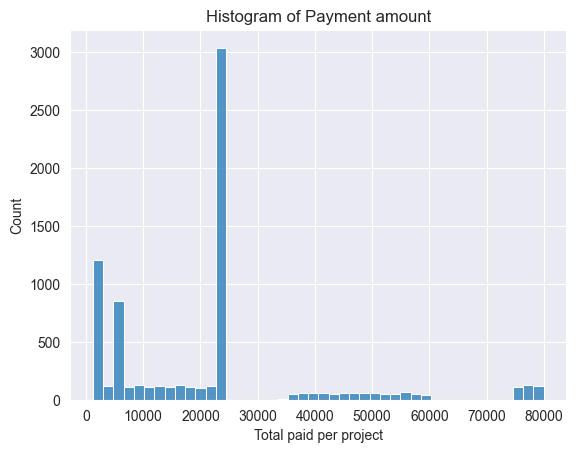

In [52]:
# Visualizacion basica de los datos
sns.set_style('darkgrid')

# Crear un histograma con la variable de pago de proyecto
g = sns.histplot(data = df, x = 'payment amount')

# Titulos del grafico
g.set_title('Histogram of Payment amount')
g.set_xlabel('Total paid per project')

Text(0.5, 0, 'Total paid per project')

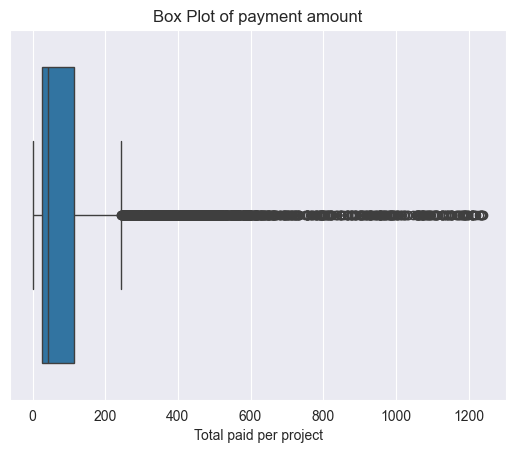

In [53]:
# Boxplot de la variable de monto de pago
g = sns.boxplot(data = df, x = 'profit margin percentage')

# Titulos del grafico
g.set_title('Box Plot of payment amount')
g.set_xlabel('Total paid per project')

In [54]:
# Calcular los percentiles
seventy_fifth = df['profit margin percentage'].quantile(0.75)
twenty_fifth = df['profit margin percentage'].quantile(0.25)

# Obtener el rango intercuartilico (IQR)
iqr = seventy_fifth - twenty_fifth

# Establecer los limites inferiores y superiores
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Obtener los datos que se encuentran fuera del rango
outliers = df[(df['profit margin percentage'] < lower) | (df['profit margin percentage'] > upper)]
outliers.head()

,payment amount,company name,company contact,company location,project name,project description,project start date,project end date,project profit margin,project state,project deadline,Date,Day,Weekday Name,Month,Month Name,Year,profit margin percentage
753,2380.0,A Mi Institute,tincidunt@protonmail.org,"Ap #521-6139 Dolor, Avenue",Ventosanzap,diam id ornare imperdiet sapien urna pretium n...,2019-08-23,2016-11-16,5981.0,Pendiente,2014-08-28,2019-02-23,23.0,Saturday,2.0,February,2019.0,251.30
1715,2108.0,Dis Parturient Industries,purus@hotmail.org,"Ap #604-7546 A, St.",Prodder,tempus sit amet sem fusce consequat nulla nisl...,2011-08-21,1753-01-01,5380.0,Entregado,2014-06-09,2021-06-10,10.0,Thursday,6.0,June,2021.0,255.22
2006,1203.0,Elit Erat Ltd,placerat.augue@icloud.edu,Ap #428-6922 Risus St.,Fix San,Vestibulum sed magna at nunc commodo placerat....,2015-02-14,2005-09-15,11409.0,Entregado,2009-09-13,2020-05-18,18.0,Monday,5.0,May,2020.0,948.38
2024,1209.0,Leo Morbi Neque Corporation,nunc.laoreet@hotmail.org,Ap #709-2733 Molestie Av.,Fix San,Nam tristique tortor eu pede.,2019-04-01,1753-01-01,9607.0,Pendiente,2022-04-17,2013-09-27,27.0,Friday,9.0,September,2013.0,794.62
2026,2604.0,Egestas Sed Limited,fusce.mi@protonmail.edu,565-4246 Penatibus Ave,Bamity,"Morbi sem mauris, laoreet ut, rhoncus aliquet,...",2010-03-19,2012-06-19,6680.0,Entregado,2007-07-16,2007-05-08,8.0,Tuesday,5.0,May,2007.0,256.53


In [55]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 1153


In [56]:
# Winzorizar los Outliers encontrados
from scipy.stats.mstats import winsorize

df_winsorized = df.copy()
df_winsorized['profit margin percentage'] = winsorize(df_winsorized['profit margin percentage'], limits = [0.05, 0.05], inplace = True)

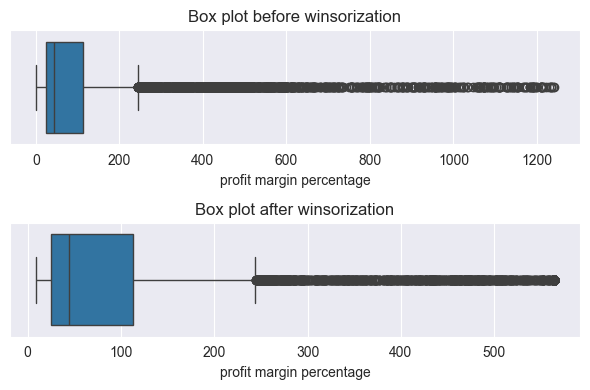

In [57]:
# Create a fig and axis for a 2x1 grid

fig, axes = plt.subplots(2, 1, figsize = (6, 4))

#  Create a box plot before and after winsorization
sns.boxplot(data = df, x = 'profit margin percentage', ax = axes[0])
sns.boxplot(data = df_winsorized, x = 'profit margin percentage', ax = axes[1])

# Add labels and titles to each plot
axes[0].set_title('Box plot before winsorization')
axes[1].set_title('Box plot after winsorization')

plt.tight_layout()

In [58]:
df_winsorized.head()

,payment amount,company name,company contact,company location,project name,project description,project start date,project end date,project profit margin,project state,project deadline,Date,Day,Weekday Name,Month,Month Name,Year,profit margin percentage
1,20058.0,Luctus Vulputate Nisi Foundation,magnis.dis@aol.edu,Ap #102-2055 In Road,Fintone,erat eros viverra eget congue eget semper rutr...,2016-10-08,2013-12-20,730.0,Pendiente,2011-03-11,2012-10-30,30.0,Tuesday,10.0,October,2012.0,8.75
3,5498.0,Lacus Nulla Foundation,dolor@outlook.net,"Ap #729-9276 Odio, Rd.",Bytecard,pede posuere nonummy integer non velit donec d...,2018-01-22,2011-10-10,1618.0,Pendiente,2022-02-12,2012-07-04,4.0,Wednesday,7.0,July,2012.0,29.43
4,12044.0,Lacus Cras Interdum Inc.,aliquet.vel@protonmail.net,"P.O. Box 244, 5793 Orci. St.",Bytecard,dui maecenas tristique est et tempus semper es...,2021-03-09,2016-02-23,3740.0,Pendiente,2015-05-16,2014-10-09,9.0,Thursday,10.0,October,2014.0,31.05
5,11298.0,Amet Limited,suspendisse@hotmail.net,Ap #360-8306 Odio Av.,Duobam,faucibus orci luctus et ultrices posuere cubil...,2021-10-28,2015-08-03,757.0,Entregado,2014-06-29,2019-05-26,26.0,Sunday,5.0,May,2019.0,8.75
8,20021.0,Diam PC,velit.eget.laoreet@hotmail.ca,7791 Aliquam Street,Voltsillam,quis libero nullam sit amet turpis elementum l...,2016-08-29,1753-01-01,0.0,Entregado,2021-09-07,2023-08-21,21.0,Monday,8.0,August,2023.0,8.75


Grafico con segmentacion categorica


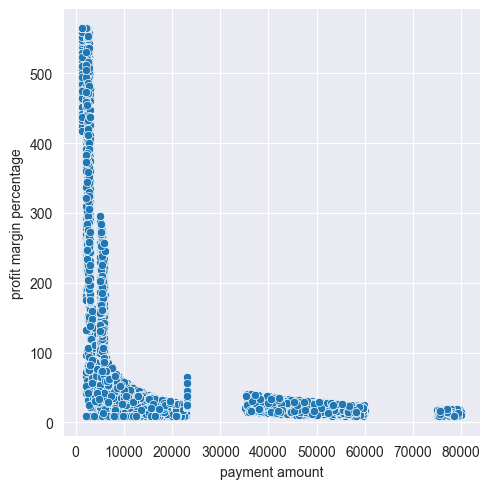

In [62]:
# Graficos de dispersion
sns.relplot(kind="scatter", x='payment amount', y='profit margin percentage', data=df_winsorized)
print("Grafico con segmentacion categorica")
plt.show()

Programando un Jointplot


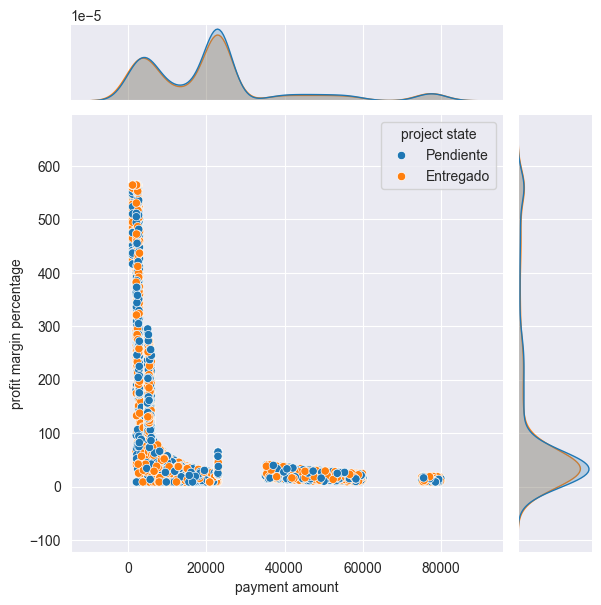

In [65]:
# Programando un Jointplot
sns.jointplot(x='payment amount', y='profit margin percentage', data=df_winsorized, hue="project state")
print("Programando un Jointplot")
plt.show()

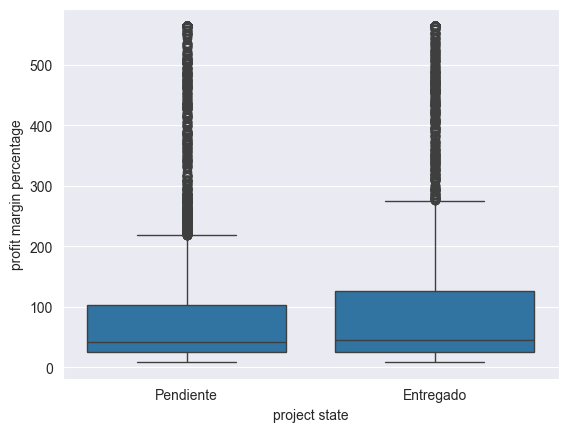

In [66]:
# Boxplot que muestra la distribucion de los proyectos por estado y el valor total del proyecto
sns.boxplot(x='project state', y='profit margin percentage', data=df_winsorized)
plt.show()

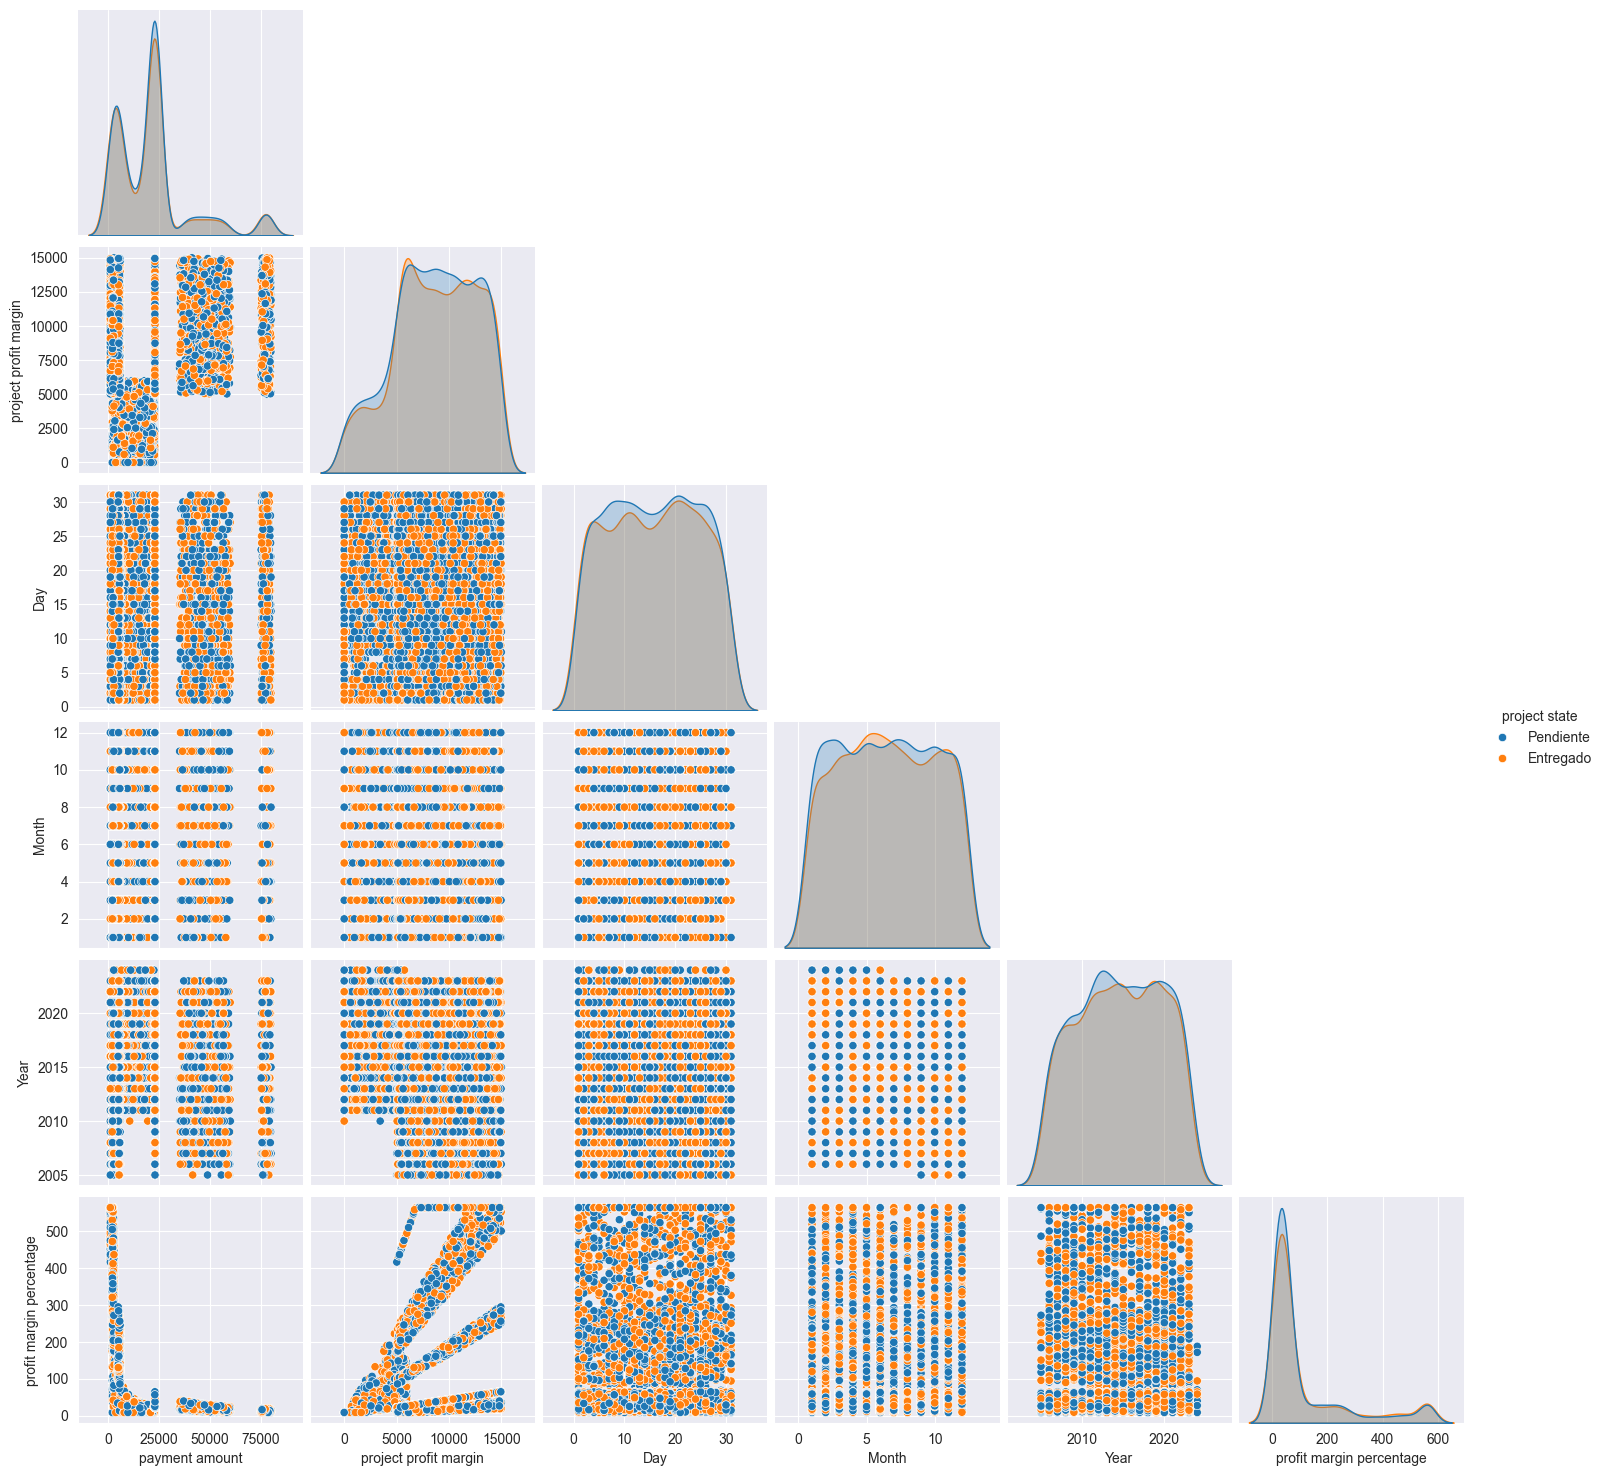

In [67]:
# Pairplot para ver si hay relacion entre las variables
sns.pairplot(data=df_winsorized, hue="project state", corner=True, kind="scatter")
plt.show()

In [72]:
# Mapa de color para revisar si existe correlacion entre las variables
from sklearn.preprocessing import StandardScaler

# Normalizacion de variables
scaler = StandardScaler()
scaled = scaler.fit_transform(
    df_winsorized[["payment amount", "project profit margin", "profit margin percentage"]]
)
scaled;

In [73]:
# Encontrar la matriz traspuesta
scaled.T;

In [74]:
# Calcular la covarianza de las variables
cov_matrix = np.cov(scaled.T)
cov_matrix

array([[ 1.00013576,  0.18446234, -0.54379489],
       [ 0.18446234,  1.00013576,  0.27341734],
       [-0.54379489,  0.27341734,  1.00013576]])

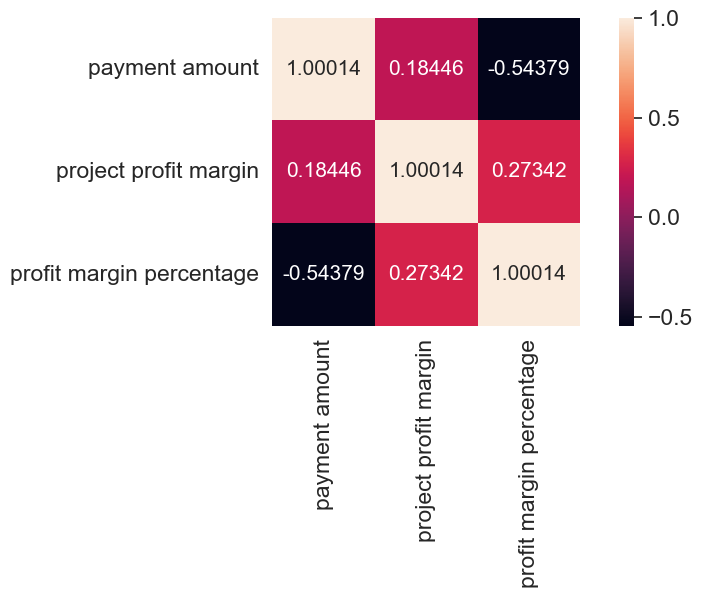

In [75]:
# Visualizar la matriz de covarianza con un mapa de calor
plt.figure(figsize=(10, 4))
sns.set(font_scale=1.5)
sns.heatmap(
    data=cov_matrix,
    annot=True,
    cbar=True,
    square=True,
    fmt=".5f",
    xticklabels=["payment amount", "project profit margin", "profit margin percentage"],
    yticklabels=["payment amount", "project profit margin", "profit margin percentage"],
    annot_kws={"size": 15}
)
plt.show()

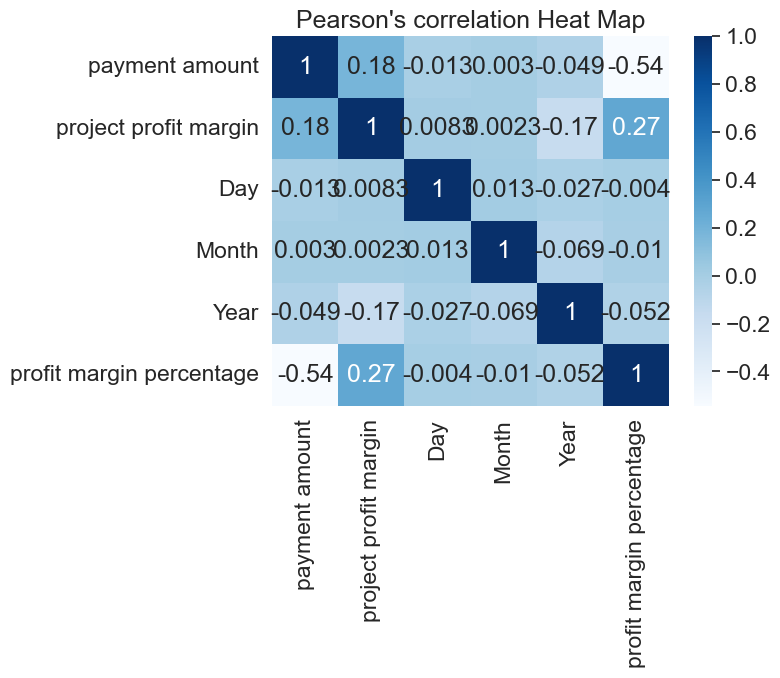

In [76]:
# Aplicando la correlacion de Pearson
eda = edaSQL.EDA(dataFrame=df_winsorized)
eda.pearsonCorrelation()

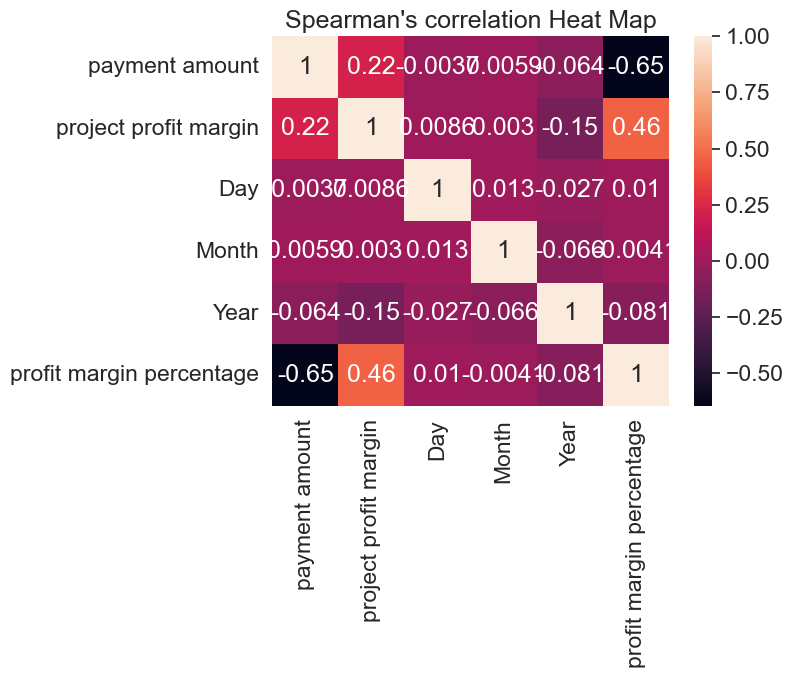

In [77]:
# Correlacion de Spearman
eda.spearmanCorrelation()

### Conclusiones


Se ha realizado un analisis EDA al Datawarehouse de la empresa Soft Developers para observar el desempeno de la empresa, hemos tomado como base de analisis uno de los indicadores proporcionados por la empresa que habla sobre el "Porcentaje de margen de ganancia", a traves de las etapas de este analisis comenzando por una breve exploracion a los datos hemos descubierto que la mayoria de proyectos realizados por la empresa son vendidos por un precio entre los 20000 y 30000 dolares esto gracias a un analisis univariado, asi como tambien los casos en que los proyectos no tienen margenes de ganancia, o bien son muy bajos a comparacion del tamano de los proyectos, tambien se ha analizado la correlacion entre el monto de los pagos, el margen de ganancia de los proyectos y el porcentaje de margen de ganancia de los proyectos donde se detecto una relacion negativa alta entre el monto de los pagos y el porcentaje de margen de ganancia, lo que nos revela que mientras uno de estos aspectos en un proyecto aumenta, el otro disminuye, a su vez la relacion entre el monto de los pagos y el margen de ganancia es positiva pero baja, lo que nos indica que mientras uno sube, el otro tambien lo hace pero en menor medida.